In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 20})

# Chapter 3. Interpolation and Polynomial Approximation
## 3.1 Interpolation and the Lagrange Polynomial

### Lagrange Polynomials

$$L_{n,k}(x) = \frac{(x-x_0)(x-x_1)\cdots(x-x_{k-1})(x-x_{k+1})\cdots(x-x_n)}{(x_k-x_0)(x_k-x_1)\cdots(x_k-x_{k-1})(x_k-x_{k+1})\cdots(x_k-x_n)} = \prod_{\substack{i=0\\ i\neq k}}^n \frac{(x-x_i)}{(x_k - x_i)}$$
<br>
<br>
$$L_{n,i}(x_j) = \delta_{ij} = \left\{\begin{array}{ll} 1 & \quad \text{if} \ i = j \\ 0 & \quad \text{if}\ i \neq j\end{array}\right. \qquad (i,\ j = 0,1,\cdots,n)$$

In [2]:
def Lagrange_polynomial(t,x,fval):
    n = x.shape[0]
    L = np.ones(n)
    for i in range(0,n):
        for j in range(0,n):
            if i!=j:
                L[i] *= (t-x[j])/(x[i]-x[j])
    val = np.sum(L*fval)
    return val     

In [3]:
# degree of polynomials
n = 3 

In [4]:
x = np.linspace(-1,1,n+1)
fval = np.eye(n+1)
xx = np.linspace(-1.3,1.3)
L = np.zeros((n+1,len(xx)))
for i in range(n+1):
    for j in range(len(xx)):
        L[i,j] = Lagrange_polynomial(xx[j],x,fval[i])

Text(0.5, 1.0, 'Lagrange Polynomials (n = 3)')

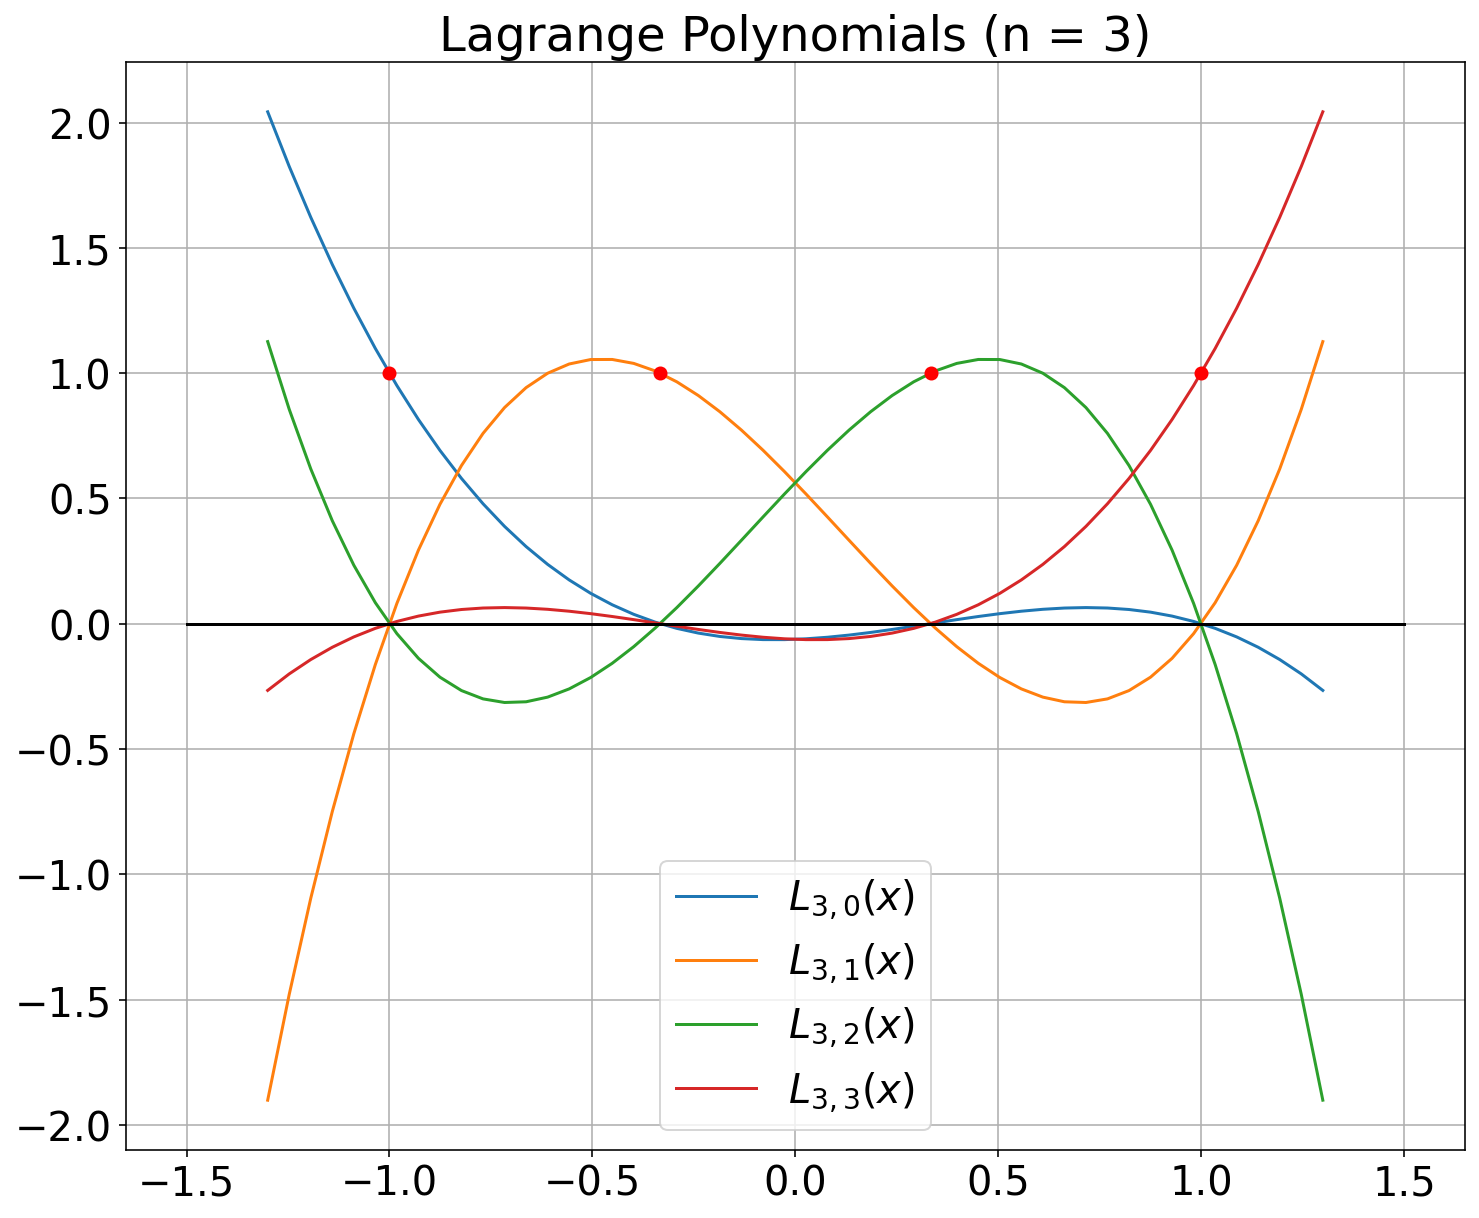

In [5]:
plt.figure(figsize=(12,10))
for i in range(n+1):
    plt.plot(xx, L[i], label = r'$L_{{{0},{1}}}(x)$'.format(n,i))
plt.plot(x, np.ones(n+1), 'ro')
plt.plot([-1.5,1.5], np.zeros(2), 'k-')
plt.grid()
plt.legend()
plt.title('Lagrange Polynomials (n = {})'.format(n))

## 3.4 Hermite Interpolation

In [6]:
def hermite_coef(x,fval,dfval):
    n = len(x)
    z = np.zeros(2*n)
    Q = np.zeros((2*n,2*n))
    for i in range(n):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
        Q[2*i,0] = fval[i]
        Q[2*i+1,0] = fval[i]
        Q[2*i+1,1] = dfval[i]
        if i != 0:
            Q[2*i, 1] = (Q[2*i,0] - Q[2*i-1,0])/(z[2*i] - z[2*i-1])

    for i in range(2,2*n):
        for j in range(2,i+1):
            Q[i,j] = (Q[i,j-1] - Q[i-1,j-1])/(z[i] - z[i-j])
    return (np.diag(Q), z)

In [7]:
def hermite_interpolation(t,z,coef):
    n = len(coef)
    val = coef[n-1]
    for i in reversed(range(n-1)):
        val *= (t-z[i])
        val += coef[i]
    return val

In [8]:
# the number of points - 1
n = 1

In [9]:
x = np.linspace(-1,1,n+1)
val_1 = np.eye(n+1)
val_2 = np.zeros(n+1)
xx = np.linspace(-1.3,1.3,200)
H = np.zeros((n+1,len(xx)))
H_hat = np.zeros((n+1,len(xx)))
for i in range(n+1):
    (Q1,z1) = hermite_coef(x,val_1[i],val_2)
    (Q2,z2) = hermite_coef(x,val_2,val_1[i])
    for j in range(len(xx)):
        H[i,j] = hermite_interpolation(xx[j],z1,Q1)
        H_hat[i,j] = hermite_interpolation(xx[j],z2,Q2)

Text(0.5, 1.0, 'Hermite Polynomials (n = 1)')

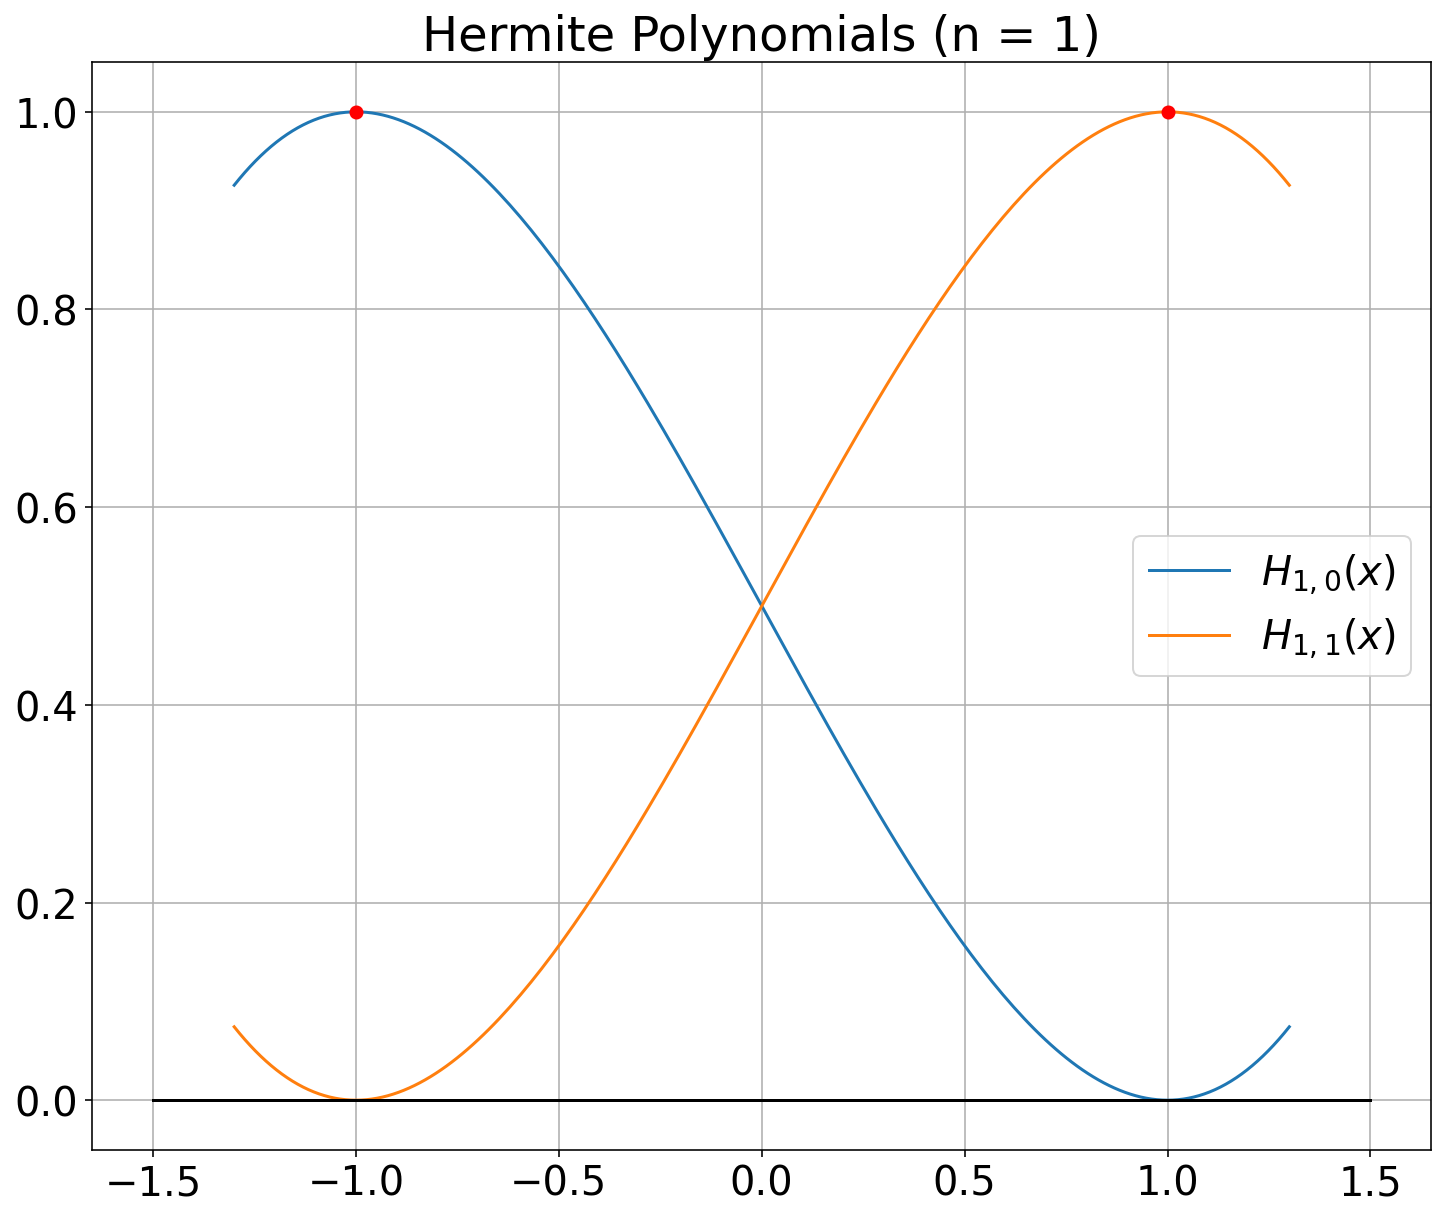

In [10]:
plt.figure(figsize=(12,10))
for i in range(n+1):
    plt.plot(xx, H[i], label = r'$H_{{{0},{1}}}(x)$'.format(n,i))
plt.plot(x,np.ones(n+1),'ro')
plt.plot([-1.5,1.5],np.zeros(2),'k-')
plt.grid()
plt.legend()
plt.title('Hermite Polynomials (n = {})'.format(n))

Text(0.5, 1.0, 'Hermite Polynomials (n = 1)')

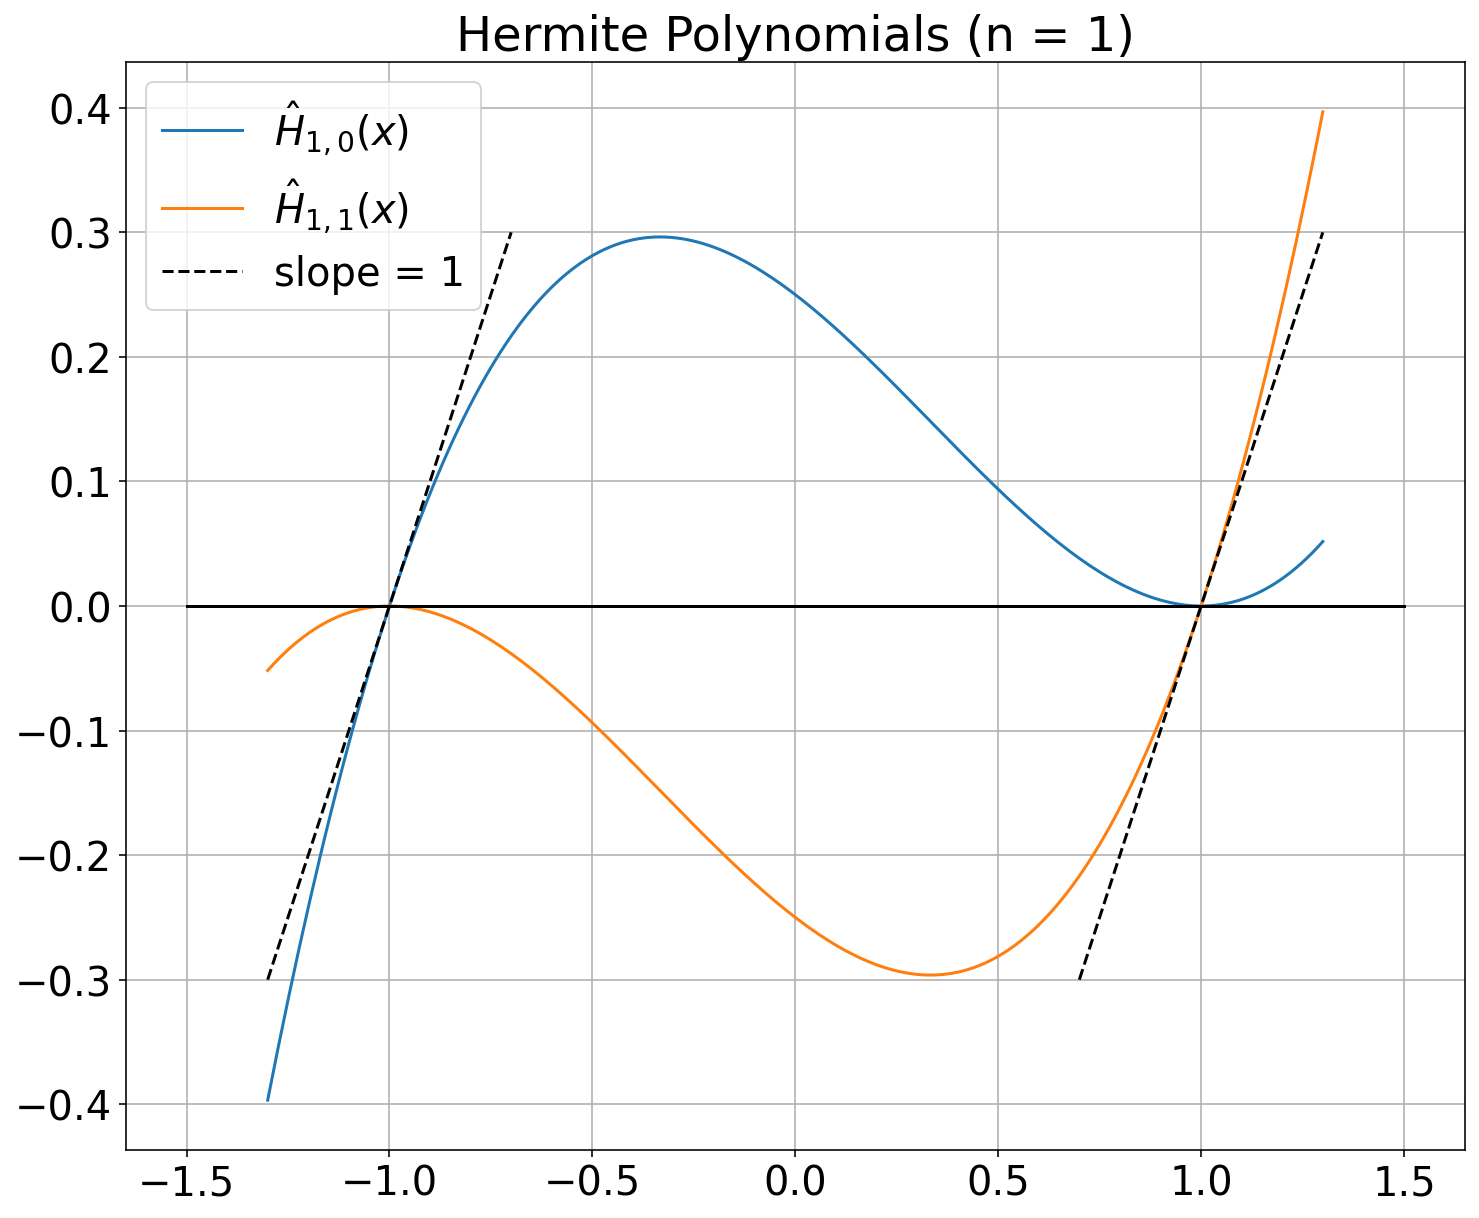

In [11]:
plt.figure(figsize=(12,10))
for i in range(n+1):
    plt.plot(xx, H_hat[i], label = r'$\hat{{H}}_{{{0},{1}}}(x)$'.format(n,i))
for i in range(n):
    plt.plot([x[i]-.3, x[i]+.3],[-.3,.3],'k--')
plt.plot([x[-1]-.3, x[-1]+.3],[-.3,.3],'k--', label='slope = 1')
plt.plot([-1.5,1.5],np.zeros(2),'k-')
plt.grid()
plt.legend()
plt.title('Hermite Polynomials (n = {})'.format(n))